Installing Pip

In [2]:
!pip install seaborn

#Importing libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#Loading the dataset

def load_dataset():
    data = pd.read_csv("googleplaystore.csv")
    return data
    

In [5]:
dataset = load_dataset()
dataset.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [6]:
#Summarizing The Dataset

def print_summarize_dataset(dataset):
    print(dataset.head(), "\n")  # View the first few rows
    print(dataset.info(), "\n")  # Info about column types and missing values
    print(dataset.describe(), "\n")  # Summary statistics
    print(dataset.isnull().sum(), "\n") #Missing values
    print(dataset.shape, "\n") # Data set shape


In [7]:
print_summarize_dataset(dataset)

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [8]:
#Cleaning The Dataset
def clean_dataset(dataset):
    df = dataset.copy()

    # Filter out rows where 'Android Ver' is not NaN
    df = df[df['Android Ver'].notnull()]

    # Filter out rows where 'Installs' is not 'Free'
    df = df[df['Installs'] != 'Free']

    # Clean 'Installs' column
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

    # Clean 'Size' column
    df['Size'] = df['Size'].str.replace('M', '000').str.replace('k', '').str.replace('Varies with device', '0').astype(float)

    # Clean 'Price' column
    df['Price'] = df['Price'].str.replace('$', '').astype(float)

    # Convert 'Reviews' column to integer
    df['Reviews'] = df['Reviews'].astype(int)

    return df
    

In [9]:
dataset = clean_dataset(dataset)
dataset.head()


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size  Installs  Type  Price Content Rating  \
0      159  19000.0     10000  Free    0.0       Everyone   
1      967  14000.0    500000  Free    0.0       Everyone   
2    87510      8.7   5000000  Free    0.0       Everyone   
3   215644  25000.0  50000000  Free    0.0           Teen   
4      967      2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [10]:
def print_histograms(dataset):
    top10_categories = dataset['Category'].value_counts().head(10)

    # Pie chart
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    top10_categories.plot(kind='pie', autopct='%1.f%%', wedgeprops={'linewidth': 10, 'edgecolor': 'white'}, shadow=True, fontsize=20)
    plt.title("% Wise Distribution of Categories")

    # Bar chart
    plt.subplot(122)
    top10_categories.plot(kind='bar', color='green')
    plt.title("Distribution of Categories")

    plt.show()

    # Count plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=dataset, x='Category')
    plt.ylabel("Number of Apps")
    plt.title("Number of Apps per Category", size=20)
    plt.xticks(rotation=90)
    plt.show()

    # Bar plot
    top10_apps_max_price = dataset.groupby(['Category'])['Price'].max().nlargest(10).reset_index()
    sns.barplot(data=top10_apps_max_price, x='Category', y='Price')
    plt.xticks(rotation=90)
    plt.title("Categories with Highest Price")
    plt.show()

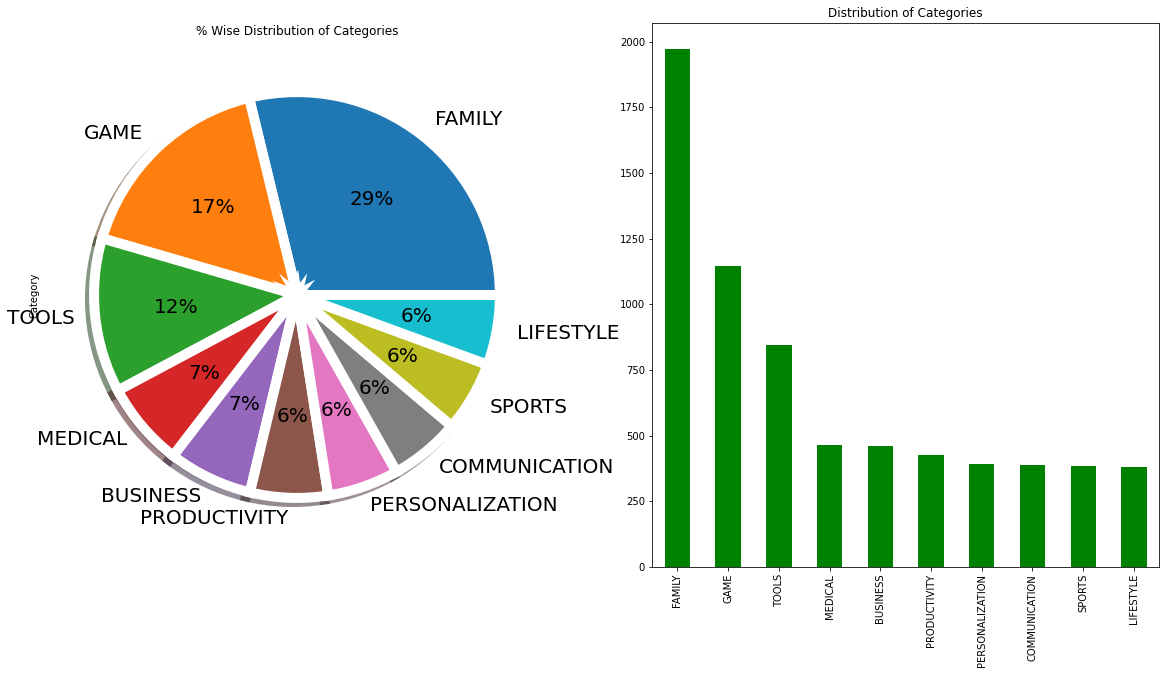

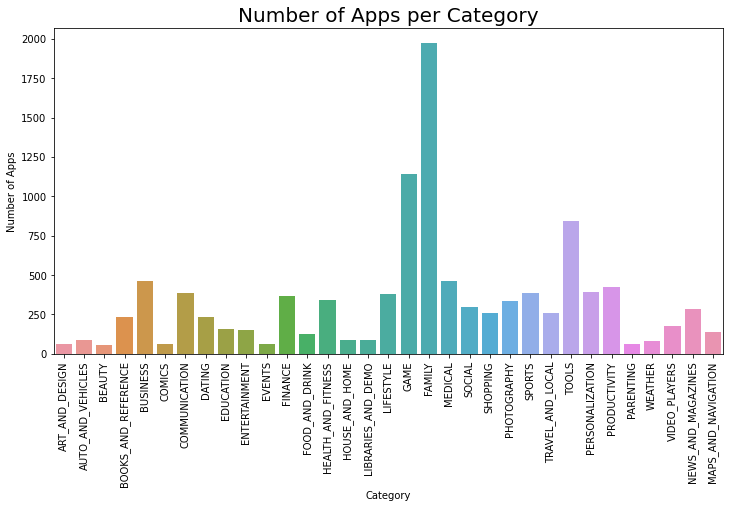

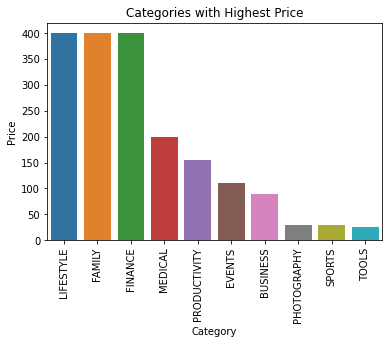

In [11]:
print_histograms(dataset)

In [12]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(10, 10))
    sns.heatmap(dataset.corr(), annot=True, cmap='plasma', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

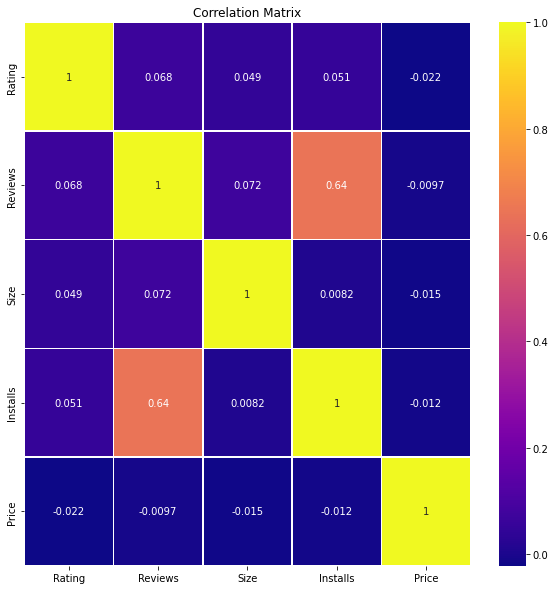

In [13]:
compute_correlations_matrix(dataset)

In [14]:

def print_scatter_matrix(dataset):
    pd.plotting.scatter_matrix(dataset, alpha=0.9, figsize=(10, 10))
    plt.show()


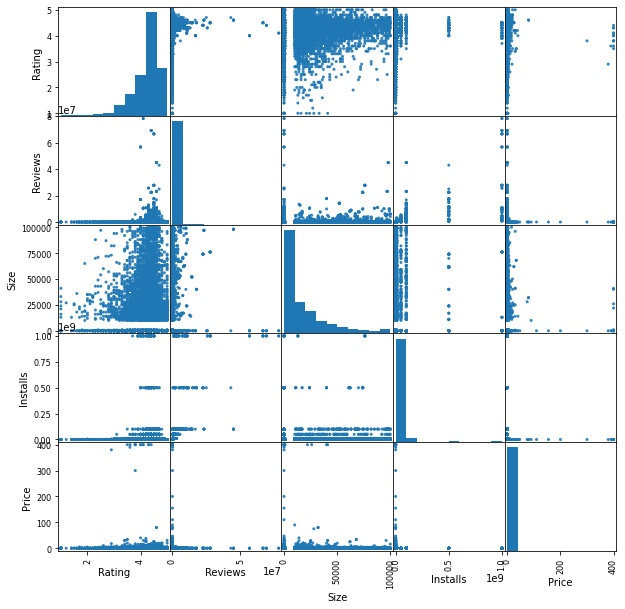

In [15]:
print_scatter_matrix(dataset)

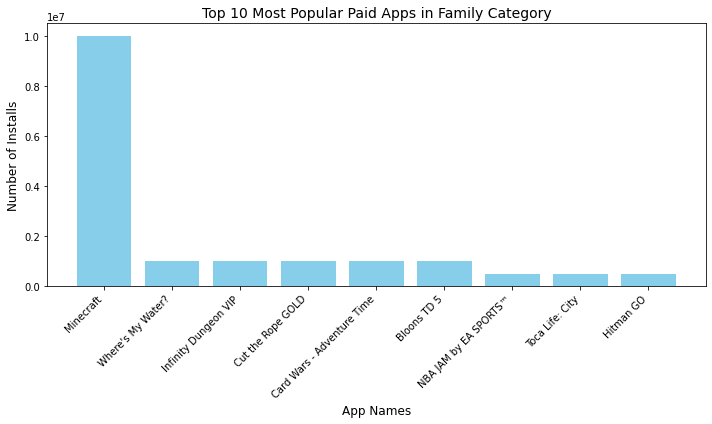

In [20]:
# Load the dataset (update 'googleplaystore.csv' with your file path)
df = pd.read_csv('googleplaystore.csv')

# Preprocess the data
# Remove commas and '+' symbols, and handle non-numeric values in the 'Installs' column
df['Installs'] = df['Installs'].replace({',': '', '\+': '', 'Free': '0'}, regex=True)

# Convert to integers, ignoring errors
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0).astype(int)

# Clean the 'Price' column
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)

# Filter for Paid Apps in the "Family" category
paid_family_apps = df[(df['Category'] == 'FAMILY') & (df['Type'] == 'Paid')]

# Select the top 10 most popular apps by number of installs
top_paid_family_apps = paid_family_apps.sort_values(by='Installs', ascending=False).head(10)

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
plt.bar(top_paid_family_apps['App'], top_paid_family_apps['Installs'], color='skyblue')
plt.title('Top 10 Most Popular Paid Apps in Family Category', fontsize=14)
plt.xlabel('App Names', fontsize=12)
plt.ylabel('Number of Installs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



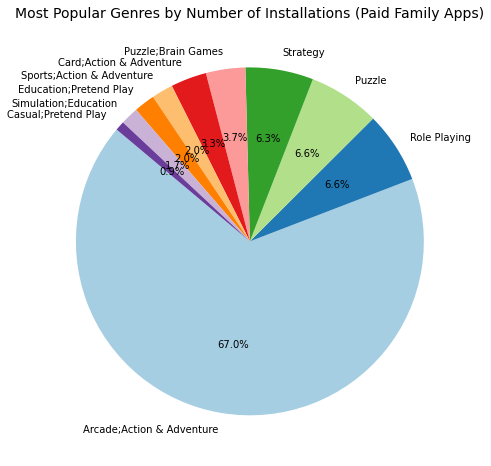

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (update 'googleplaystore.csv' with your file path)
df = pd.read_csv('googleplaystore.csv')

# Preprocess the data
# Clean and convert the 'Installs' column
df['Installs'] = df['Installs'].replace({',': '', '\+': '', 'Free': '0'}, regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').fillna(0).astype(int)

# Clean and convert the 'Price' column
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)

# Filter for Paid Apps in the "Family" category
paid_family_apps = df[(df['Category'] == 'FAMILY') & (df['Type'] == 'Paid')]

# Group by genres (assuming there's a 'Genres' column) and sum the installations
genre_installs = paid_family_apps.groupby('Genres')['Installs'].sum()

# Sort genres by number of installations and select the top ones
top_genres = genre_installs.sort_values(ascending=False).head(10)

# Plotting the pie diagram
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Most Popular Genres by Number of Installations (Paid Family Apps)', fontsize=14)
plt.show()
